# Step 1

In [5]:
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np

In [17]:
cats = [cv2.imread(file) for file in glob.glob("training_set/training_set/cats/cat.*.jpg")]
dogs = [cv2.imread(file) for file in glob.glob("training_set/training_set/dogs/dog.*.jpg")]





In [15]:
!mkdir "10cats"
!mkdir "10dogs"
!ls

10cats
10dogs
23777_30378_bundle_archive.zip
Advertising.csv
E18CSE140_DL_Lab1.ipynb
E18CSE140_DL_Lab2.ipynb
E18CSE140_DL_Lab2_Part2.ipynb
E18CSE140_DL_Lab3.ipynb
Online Retail.xlsx
Untitled.ipynb
Untitled1.ipynb
test_set
training_set


In [18]:
for i in range(10):
    print("Writing "+str(i+1)+"th cat image")
    cv2.imwrite('10cats/'+str(i+1)+'.jpg',cats[i])
    print("Writing "+str(i+1)+"th dog image")
    cv2.imwrite('10dogs/'+str(i+1)+'.jpg',dogs[i])

Writing 1th cat image
Writing 1th dog image
Writing 2th cat image
Writing 2th dog image
Writing 3th cat image
Writing 3th dog image
Writing 4th cat image
Writing 4th dog image
Writing 5th cat image
Writing 5th dog image
Writing 6th cat image
Writing 6th dog image
Writing 7th cat image
Writing 7th dog image
Writing 8th cat image
Writing 8th dog image
Writing 9th cat image
Writing 9th dog image
Writing 10th cat image
Writing 10th dog image


In [21]:
print("Proof of image being written - ")
print("CATS")
!ls 10cats/
print()
print("DOGS")
!ls 10dogs/

Proof of image being written - 
CATS
1.jpg
10.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg

DOGS
1.jpg
10.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


# Step 2

In [22]:
cats = [cv2.imread(file) for file in glob.glob("10cats/*.jpg")]
dogs = [cv2.imread(file) for file in glob.glob("10dogs/*.jpg")]
for i in range(10):
    print("Size of cat image "+str(i+1)+" "+str(cats[i].shape))

Size of cat image 1 (280, 300, 3)
Size of cat image 2 (375, 499, 3)
Size of cat image 3 (499, 489, 3)
Size of cat image 4 (499, 403, 3)
Size of cat image 5 (149, 150, 3)
Size of cat image 6 (499, 336, 3)
Size of cat image 7 (407, 379, 3)
Size of cat image 8 (269, 259, 3)
Size of cat image 9 (375, 499, 3)
Size of cat image 10 (333, 500, 3)


In [25]:
print("Resizing the Images we get - ")

Resizing the Images we get - 


In [24]:
cats = [cv2.resize(file, (500, 500))  for file in cats]
dogs = [cv2.resize(file, (500, 500))  for file in dogs]
for i in range(10):
    print("Size of cat image "+str(i+1)+" "+str(cats[i].shape))

Size of cat image 1 (500, 500, 3)
Size of cat image 2 (500, 500, 3)
Size of cat image 3 (500, 500, 3)
Size of cat image 4 (500, 500, 3)
Size of cat image 5 (500, 500, 3)
Size of cat image 6 (500, 500, 3)
Size of cat image 7 (500, 500, 3)
Size of cat image 8 (500, 500, 3)
Size of cat image 9 (500, 500, 3)
Size of cat image 10 (500, 500, 3)


# Step 3

In [6]:
trainc=[cv2.imread(file,0) for file in glob.glob("training_set/training_set/cats/cat.*.jpg")]
traind=[cv2.imread(file,0) for file in glob.glob("training_set/training_set/dogs/dog.*.jpg")]
testc=[cv2.imread(file,0) for file in glob.glob("test_set/test_set/cats/cat.*.jpg")]
testd=[cv2.imread(file,0) for file in glob.glob("test_set/test_set/dogs/dog.*.jpg")]

In [13]:
print(len(trainc))
print(len(testc))
print(len(traind))
print(len(testd))
print("Shape of one image - ",str(trainc[0].shape))

4000
1011
4005
1012
Shape of one image -  (280, 300)


In [14]:
final=np.append(np.append(trainc,testc),np.append(traind,testd))
print(len(final))

10028


C:\Users\RAGHAV VERMA\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


# Step 4 & 5

In [27]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
runningtimes=[]
noofparameters=[]
trainaccu=[]
testaccu=[]

## 10x10 Images

In [29]:
resized500 = [cv2.resize(file, (10, 10))  for file in final]
resized500=np.array(resized500)
X=resized500
y=np.append(np.full(len(trainc)+len(testc),0),np.full(len(traind)+len(testd),1))
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
X_train = X_train_flatten.T
X_test = X_test_flatten.T
y_train=y_train.T.ravel()
y_test=y_test.T.ravel()

In [30]:
lr=LogisticRegression(random_state = 0,max_iter=1500)
t=time.time()
lr.fit(X_train.T,y_train.T)
runningtimes.append(time.time()-t)
y_pred_test=lr.predict(X_test.T)
y_pred_train=lr.predict(X_train.T)  
noofparameters.append(lr.n_features_in_)

print('train accuracy: {}'.format(lr.score(X_train.T,y_train.T)))
print('test accuracy: {}'.format(lr.score(X_test.T,y_test.T)))
trainaccu.append(lr.score(X_train.T,y_train.T))
testaccu.append(lr.score(X_test.T,y_test.T))

train accuracy: 0.5834330541151442
test accuracy: 0.5396888711607499


## 25x25 Images

In [31]:
resized500 = [cv2.resize(file, (25, 25))  for file in final]
resized500=np.array(resized500)
X=resized500
y=np.append(np.full(len(trainc)+len(testc),0),np.full(len(traind)+len(testd),1))
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
X_train = X_train_flatten.T
X_test = X_test_flatten.T
y_train=y_train.T.ravel()
y_test=y_test.T.ravel()

In [32]:
lr=LogisticRegression(random_state = 0,max_iter=1500)
t=time.time()
lr.fit(X_train.T,y_train.T)
runningtimes.append(time.time()-t)
y_pred_test=lr.predict(X_test.T)
y_pred_train=lr.predict(X_train.T)  
noofparameters.append(lr.n_features_in_)

print('train accuracy: {}'.format(lr.score(X_train.T,y_train.T)))
print('test accuracy: {}'.format(lr.score(X_test.T,y_test.T)))
trainaccu.append(lr.score(X_train.T,y_train.T))
testaccu.append(lr.score(X_test.T,y_test.T))

train accuracy: 0.6378141204627045
test accuracy: 0.5285201435979258


## 50x50 Images

In [33]:
resized500 = [cv2.resize(file, (50, 50))  for file in final]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
X_train = X_train_flatten.T
X_test = X_test_flatten.T
y_train=y_train.T.ravel()
y_test=y_test.T.ravel()
lr=LogisticRegression(random_state = 0,max_iter=2000)
t=time.time()
lr.fit(X_train.T,y_train.T)
runningtimes.append(time.time()-t)
y_pred_test=lr.predict(X_test.T)
y_pred_train=lr.predict(X_train.T)  

noofparameters.append(lr.n_features_in_)
print('train accuracy: {}'.format(lr.score(X_train.T,y_train.T)))
print('test accuracy: {}'.format(lr.score(X_test.T,y_test.T)))
trainaccu.append(lr.score(X_train.T,y_train.T))
testaccu.append(lr.score(X_test.T,y_test.T))

train accuracy: 0.6378141204627045
test accuracy: 0.5285201435979258


## 75x75 Images

In [34]:
resized500 = [cv2.resize(file, (75, 75))  for file in final]
resized500=np.array(resized500)
X=resized500
y=np.append(np.full(len(trainc)+len(testc),0),np.full(len(traind)+len(testd),1))
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
X_train = X_train_flatten.T
X_test = X_test_flatten.T
y_train=y_train.T.ravel()
y_test=y_test.T.ravel()

In [35]:
lr=LogisticRegression(random_state = 0,max_iter=2000)
t=time.time()
lr.fit(X_train.T,y_train.T)
runningtimes.append(time.time()-t)

y_pred_test=lr.predict(X_test.T)
y_pred_train=lr.predict(X_train.T)  

noofparameters.append(lr.n_features_in_)
print('train accuracy: {}'.format(lr.score(X_train.T,y_train.T)))
print('test accuracy: {}'.format(lr.score(X_test.T,y_test.T)))
trainaccu.append(lr.score(X_train.T,y_train.T))
testaccu.append(lr.score(X_test.T,y_test.T))

C:\Users\RAGHAV VERMA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train accuracy: 1.0
test accuracy: 0.506980454726765


## 100x100 Images

In [36]:
resized500 = [cv2.resize(file, (100, 100))  for file in final]
resized500=np.array(resized500)
X=resized500
y=np.append(np.full(len(trainc)+len(testc),0),np.full(len(traind)+len(testd),1))
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
X_train = X_train_flatten.T
X_test = X_test_flatten.T
y_train=y_train.T.ravel()
y_test=y_test.T.ravel()

In [37]:
lr=LogisticRegression(random_state = 0,max_iter=1500)
t=time.time()
lr.fit(X_train.T,y_train.T)
runningtimes.append(time.time()-t)

y_pred_test=lr.predict(X_test.T)
y_pred_train=lr.predict(X_train.T)  

noofparameters.append(lr.n_features_in_)
print('train accuracy: {}'.format(lr.score(X_train.T,y_train.T)))
print('test accuracy: {}'.format(lr.score(X_test.T,y_test.T)))
trainaccu.append(lr.score(X_train.T,y_train.T))
testaccu.append(lr.score(X_test.T,y_test.T))

C:\Users\RAGHAV VERMA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train accuracy: 1.0
test accuracy: 0.5097726366174711


In [49]:
import matplotlib.pyplot as plt
sizes=[10,25,50,75,100]

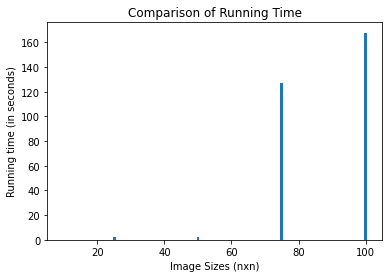

In [50]:
plt.bar(sizes,runningtimes)
plt.title('Comparison of Running Time')
plt.xlabel('Image Sizes (nxn)')
plt.ylabel('Running time (in seconds)')
plt.show()

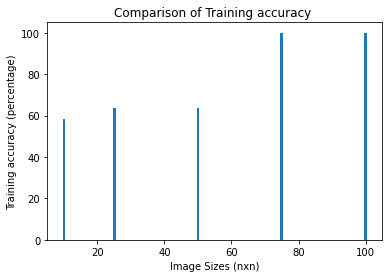

In [51]:
plt.bar(sizes,[i*100 for i in trainaccu])
plt.title('Comparison of Training accuracy ')
plt.xlabel('Image Sizes (nxn)')
plt.ylabel('Training accuracy (percentage)')
plt.show()

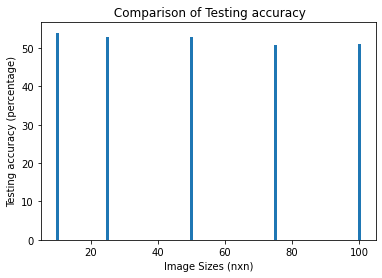

In [52]:
plt.bar(sizes,[i*100 for i in testaccu])
plt.title(' Comparison of Testing accuracy')
plt.xlabel('Image Sizes (nxn)')
plt.ylabel('Testing accuracy (percentage)')
plt.show()

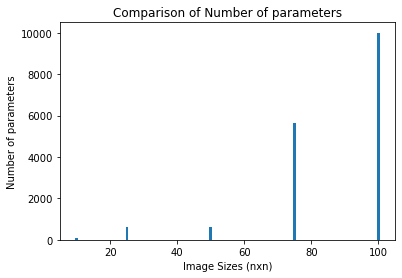

In [53]:
plt.bar(sizes,noofparameters)
plt.title('Comparison of Number of parameters')
plt.xlabel('Image Sizes (nxn)')
plt.ylabel('Number of parameters')
plt.show()

In [1]:
print("Model does well on training set with increasing size but worse on test sets comparitively")

Model does well on training set with increasing size but worse on test sets comparitively
